In [1]:
pip install fastai --upgrade

Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (2.0.10)


In [2]:
pip freeze

absl-py==0.8.1
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
argon2-cffi==20.1.0
asgiref==3.2.10
astor==0.8.1
astropy==4.0.1.post1
astunparse==1.6.3
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.1.0
audioread==2.1.8
autograd==1.3
Babel==2.8.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.1.5
blis==0.4.1
bokeh==2.1.1
boto==2.49.0
boto3==1.14.48
botocore==1.17.48
Bottleneck==1.3.2
branca==0.4.1
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.1.1
catalogue==1.0.0
certifi==2020.6.20
cffi==1.14.2
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.4.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.1
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cupy-cuda101==7.4.0
cvxopt==1.2.5
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.3
Cython==0.29.21
daft==0.0.4
dask==2.12.0
dataclasses==0.7
datascience==0.10.6
debugpy==1.0.0rc2
decorator==4.4.2
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.2
distributed==1.25.3
Django==3

In [3]:
from fastai.tabular.all import *

from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
base_dir = '/content/gdrive/My Drive/Digikala Contest/Sales Forecast'

In [5]:
!unzip '/content/gdrive/My Drive/Digikala Contest/Sales Forecast/ML_User_Data.zip' -d '/content/gdrive/My Drive/Digikala Contest/Sales Forecast'

Archive:  /content/gdrive/My Drive/Digikala Contest/Sales Forecast/ML_User_Data.zip
replace /content/gdrive/My Drive/Digikala Contest/Sales Forecast/answer_style.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [6]:
train_df = pd.read_csv(base_dir + '/train.csv') 
test_df = pd.read_csv(base_dir + '/test.csv')

In [7]:
train_df.head(10)

,id,date,seller,item,sales
0,0,2015-05-01,1,1,21
1,1,2015-05-01,2,1,45
2,2,2015-05-01,3,1,28
3,3,2015-05-01,4,1,34
4,4,2015-05-01,5,1,21
5,5,2015-05-01,6,1,21
6,6,2015-05-01,7,1,27
7,7,2015-05-01,8,1,27
8,8,2015-05-01,9,1,28
9,9,2015-05-01,10,1,25


In [8]:
train_df = add_datepart(train_df, 'date')

In [9]:
train_df.head(10)

,id,seller,Week,item,sales,Year,Month,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,0,1,18,1,21,2015,5,1,4,121,False,True,False,False,False,False,1430438400
1,1,2,18,1,45,2015,5,1,4,121,False,True,False,False,False,False,1430438400
2,2,3,18,1,28,2015,5,1,4,121,False,True,False,False,False,False,1430438400
3,3,4,18,1,34,2015,5,1,4,121,False,True,False,False,False,False,1430438400
4,4,5,18,1,21,2015,5,1,4,121,False,True,False,False,False,False,1430438400
5,5,6,18,1,21,2015,5,1,4,121,False,True,False,False,False,False,1430438400
6,6,7,18,1,27,2015,5,1,4,121,False,True,False,False,False,False,1430438400
7,7,8,18,1,27,2015,5,1,4,121,False,True,False,False,False,False,1430438400
8,8,9,18,1,28,2015,5,1,4,121,False,True,False,False,False,False,1430438400
9,9,10,18,1,25,2015,5,1,4,121,False,True,False,False,False,False,1430438400


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                900000 non-null  int64 
 1   seller            900000 non-null  int64 
 2   Week              900000 non-null  int64 
 3   item              900000 non-null  int64 
 4   sales             900000 non-null  int64 
 5   Year              900000 non-null  int64 
 6   Month             900000 non-null  int64 
 7   Day               900000 non-null  int64 
 8   Dayofweek         900000 non-null  int64 
 9   Dayofyear         900000 non-null  int64 
 10  Is_month_end      900000 non-null  bool  
 11  Is_month_start    900000 non-null  bool  
 12  Is_quarter_end    900000 non-null  bool  
 13  Is_quarter_start  900000 non-null  bool  
 14  Is_year_end       900000 non-null  bool  
 15  Is_year_start     900000 non-null  bool  
 16  Elapsed           900000 non-null  obj

In [11]:
n = len(train_df);
n

900000

In [12]:
procs=[FillMissing, Categorify, Normalize]

In [13]:
cat_vars = ['seller', 'item', 'Week', 'Year', 'Month' ,'Day', 'Dayofweek', 'Dayofyear',
    'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']

cont_vars = []

dep_var = 'sales'

In [14]:
train_df[dep_var].head()

0    21
1    45
2    28
3    34
4    21
Name: sales, dtype: int64

In [15]:
splits = RandomSplitter(valid_pct=0.1)(range_of(train_df))

In [16]:
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
                   cat_names = cat_vars,
                   cont_names = cont_vars,
                   y_names=dep_var,
                   splits=splits)

In [17]:
dls = to.dataloaders(bs=64)

In [18]:
dls.show_batch()

,seller,item,Week,Year,Month,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,sales
0,2,22,1,2016,1,6,2,6,False,False,False,False,False,False,50
1,9,39,39,2015,9,26,5,269,False,False,False,False,False,False,80
2,4,6,40,2017,10,4,2,277,False,False,False,False,False,False,58
3,2,26,48,2018,11,30,4,334,True,False,False,False,False,False,52
4,2,12,33,2019,8,12,0,224,False,False,False,False,False,False,76
5,2,45,47,2016,11,25,4,330,False,False,False,False,False,False,54
6,10,3,34,2018,8,26,6,238,False,False,False,False,False,False,89
7,9,45,12,2016,3,26,5,86,False,False,False,False,False,False,33
8,3,13,30,2019,7,25,3,206,False,False,False,False,False,False,67
9,9,3,15,2018,4,11,2,101,False,False,False,False,False,False,58


In [19]:
learn = tabular_learner(dls, metrics=rmse)

In [20]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(11, 6)
    (1): Embedding(51, 14)
    (2): Embedding(54, 15)
    (3): Embedding(7, 5)
    (4): Embedding(13, 7)
    (5): Embedding(32, 11)
    (6): Embedding(8, 5)
    (7): Embedding(367, 44)
    (8): Embedding(3, 3)
    (9): Embedding(3, 3)
    (10): Embedding(3, 3)
    (11): Embedding(3, 3)
    (12): Embedding(3, 3)
    (13): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(125, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=125, out_features=200, bias=False)
      (2): ReLU(inplace=True)
    )
    (1): LinBnDrop(
      (0): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=200, out_features=100, bias=False)
      (2): ReLU(inplace=True)
    )
    (2)

In [21]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,_rmse,time
0,60.330025,55.010132,7.416883,03:37


In [22]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,_rmse,time
0,58.667175,54.341873,7.371696,03:38


SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=1.737800812406931e-05)

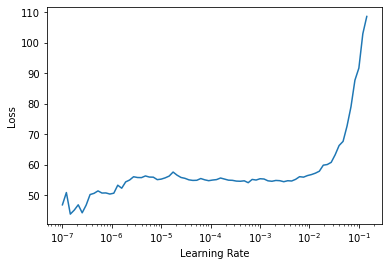

In [23]:
learn.lr_find()

In [25]:
learn.fit_one_cycle(1,1.737800812406931e-05, wd=0.2)

epoch,train_loss,valid_loss,_rmse,time
0,56.059853,54.234310,7.364401,03:37


In [29]:
test_df = add_datepart(test_df, 'date')

In [30]:
dl = learn.dls.test_dl(test_df)

In [32]:
x = learn.get_preds(dl=dl)

In [37]:
len(x[0])

13000

In [61]:
a = list()
for i in range(len(x[0])):
  a.append(x[0][i].item())
test_df['sales'] = a

In [62]:
prediction_df = test_df.copy()

In [63]:
prediction_df.drop(labels=
                   ['seller', 'Week', 'item', 'Year', 'Month', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed'],
                   axis=1, inplace=True)

In [65]:
prediction_df.to_csv(base_dir + '/predictions.csv', index= False)